In [ ]:
!pip install fal-client

In [ ]:
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# https://fal.ai/dashboard/keys
# put your key in the .env file with the name FAL_KEY


Original Image with padding:


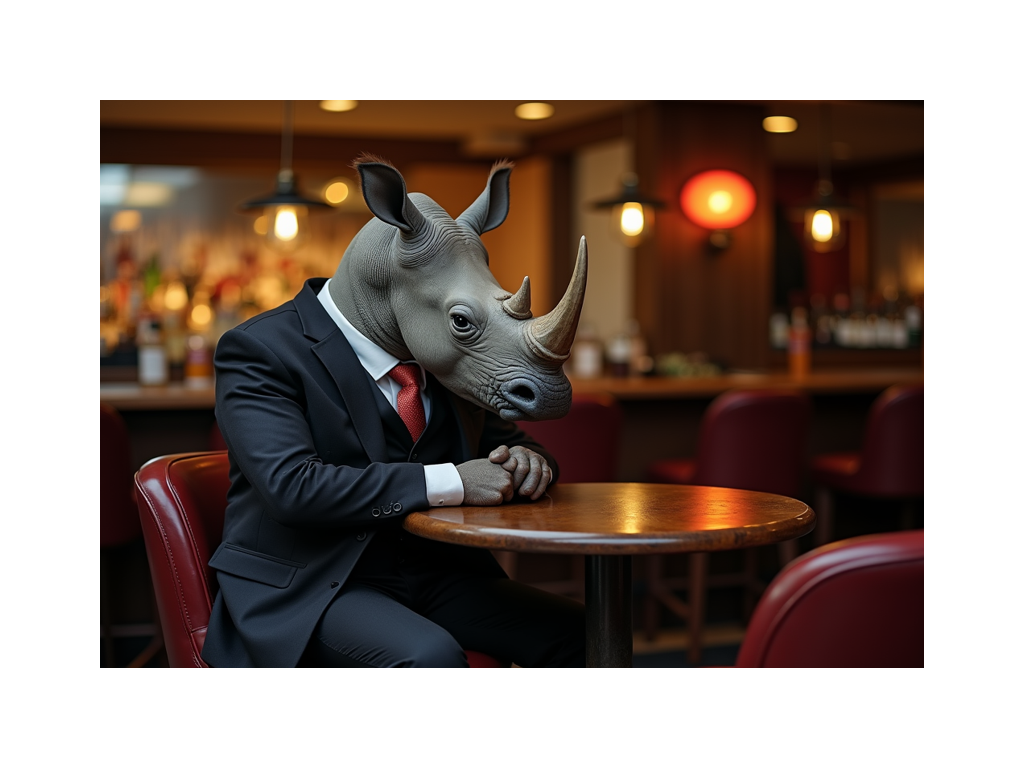


Added Mask:


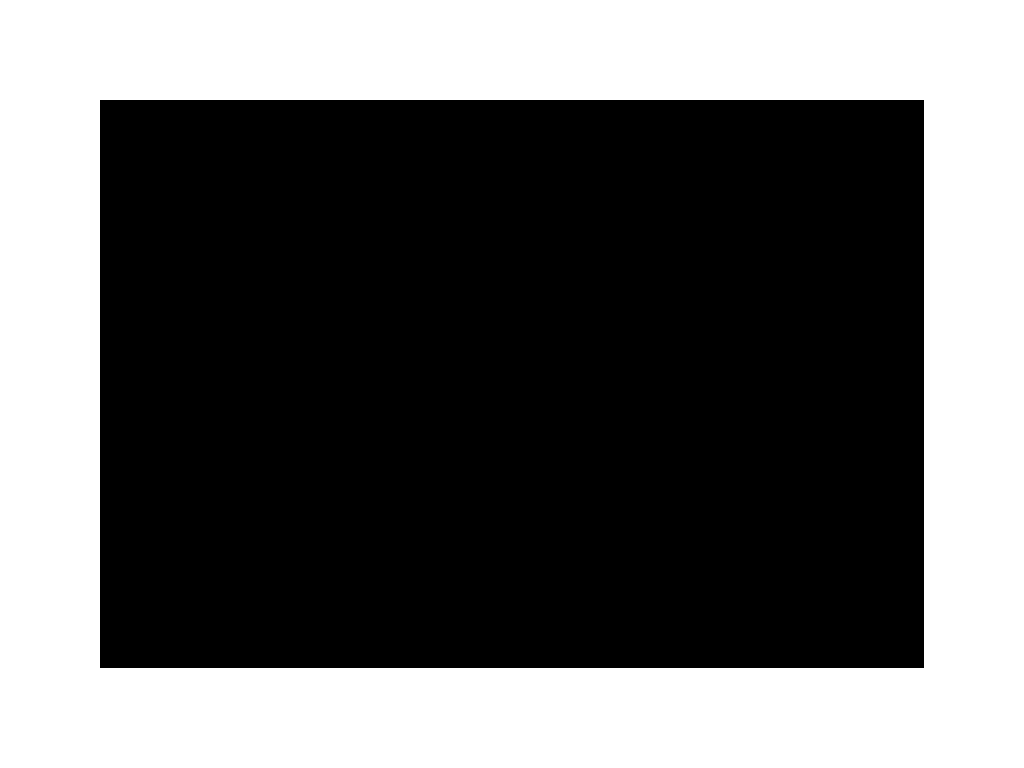

In [ ]:
import fal_client
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display

original_img = Image.open("rhino-suit.png")

# Calculate dimensions for shrunk image
target_width = original_img.size[0] - 200  # Reduce by 200px total
target_height = original_img.size[1] - 200  # Reduce by 200px total
shrunk_img = original_img.resize((target_width, target_height))

# Create new image with white background and paste shrunk image in center
new_width = original_img.size[0]  # Keep original dimensions
new_height = original_img.size[1]
new_img = Image.new('RGB', (new_width, new_height), 'white')
new_img.paste(shrunk_img, (100, 100))  # Paste at offset (100,100)

# Save and upload the new image
new_img.save("rhino-suit-padded.png")
image_url = fal_client.upload_file("rhino-suit-padded.png")

# Create mask with shrunk image in middle and 100px border mask
mask_img = Image.new('L', (new_width, new_height), 255)  # White background
inner_box = (100, 100, new_width-100, new_height-100)
mask_img.paste(0, inner_box)  # Black rectangle in middle

# Save mask image temporarily to upload it
mask_img.save("temp_mask.png")
mask_url = fal_client.upload_file("temp_mask.png")

# Display images
print("\nOriginal Image with padding:")
display(new_img)
print("\nAdded Mask:")
display(mask_img)


{'images': [{'url': 'https://fal.media/files/monkey/9rZjh9hEEKzshKLXBDhIM_6ddc63e703014871b820854ee3b902af.jpg', 'width': 1024, 'height': 768, 'content_type': 'image/jpeg'}], 'timings': {}, 'seed': 2215056808, 'has_nsfw_concepts': [False], 'prompt': 'photo of a rhino dressed suit and tie sitting at a table in a bar with a bar stools, award winning photography, Elke vogelsang'}

After transformation:


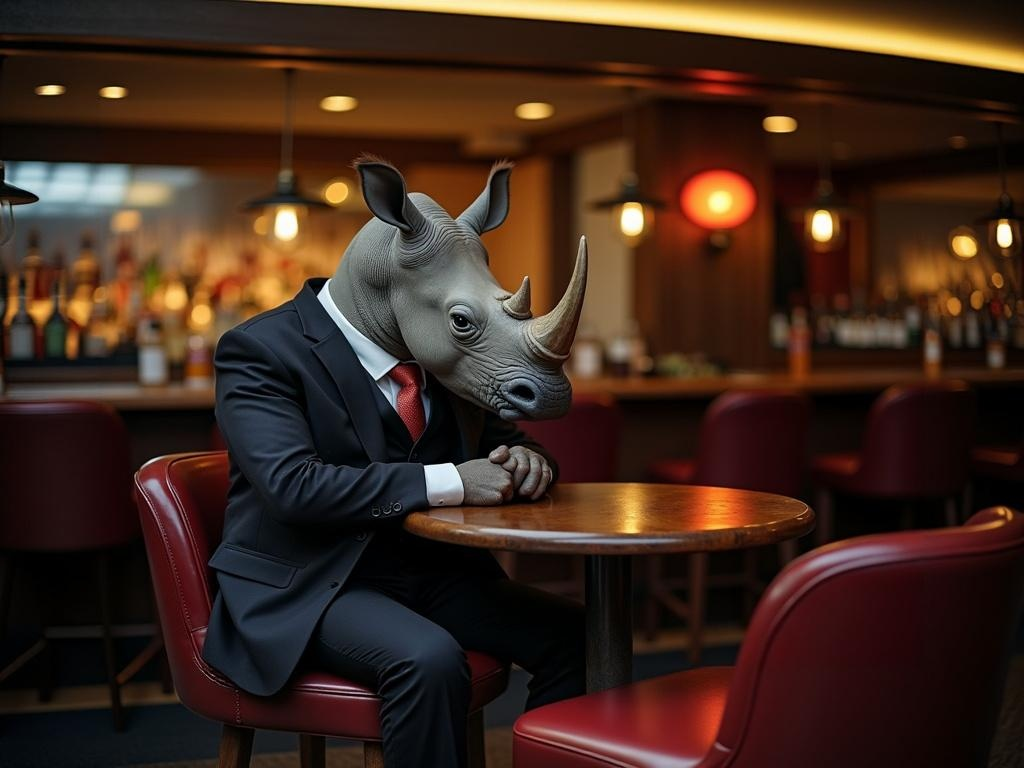

In [19]:
def on_queue_update(update):
    if isinstance(update, fal_client.InProgress):
        for log in update.logs:
           print(log["message"])

prompt = "photo of a rhino dressed suit and tie sitting at a table in a bar with a bar stools, award winning photography, Elke vogelsang"

result = fal_client.subscribe(
    "fal-ai/flux-pro/v1/fill",
    arguments={
        "image_url": image_url,
        "mask_url": mask_url,
        "prompt": prompt
    },
    with_logs=True,
    on_queue_update=on_queue_update,
)
print(result)

print("\nAfter transformation:")

# Get and display transformed image
image_url = result['images'][0]['url']
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
display(img)